In [1]:
import pandas as pd

### Extraction des données

In [2]:
X_train = pd.read_csv('X_train.csv', index_col=0)
X_train.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [3]:
y_train = pd.read_csv("Y_train.csv", index_col=0)
y_train.head()

,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


In [4]:
df = pd.concat([X_train, y_train], axis=1)
df.head()

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   prdtypecode  84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


In [6]:
# transformations des colonnes nécessaires en chaines de caractères
cols_cat = ['productid', 'imageid', 'prdtypecode']
df[cols_cat] = df[cols_cat].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  object
 3   imageid      84916 non-null  object
 4   prdtypecode  84916 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB


In [7]:
prdtypecodes = list(df['prdtypecode'].unique())
print("Modalités d'origine des {} produits :\n".format(len(prdtypecodes)))
print(prdtypecodes)

Modalités d'origine des 27 produits :

['10', '2280', '50', '1280', '2705', '2522', '2582', '1560', '1281', '1920', '2403', '1140', '2583', '1180', '1300', '2462', '1160', '2060', '40', '60', '1320', '1302', '2220', '2905', '2585', '1940', '1301']


In [8]:
# table de correspondances avec les nouvelles modalités
## on renomme les catégories de 0 à 26 -> 27 catégories
target_labels = [str(n) for n in range(27)]
lab_enc = pd.DataFrame({'prdtypecode': prdtypecodes, 'target': target_labels}).astype('str')
lab_enc

,prdtypecode,target
0,10,0
1,2280,1
2,50,2
3,1280,3
4,2705,4
5,2522,5
6,2582,6
7,1560,7
8,1281,8
9,1920,9


In [9]:
# Remplacement des labels dans le dataframe (colonne target)
df['target'] = df['prdtypecode'].replace(prdtypecodes, target_labels)
df = df.drop(columns = ['prdtypecode'])
df.head()

,designation,description,productid,imageid,target
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,0
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,1
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,2
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,3
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,4


In [10]:
# Existence de doublons ?
df.duplicated().any()

False

In [11]:
print("Nombres de lignes du dataframe : ", len(df))
print("Nombre de 'productid' distincts : ", len(df['productid'].unique()))
print("Nombre de 'imageid' distincts : ", len(df['imageid'].unique()))

# Il y a bien autant de lignes que de produits distincs.

Nombres de lignes du dataframe :  84916
Nombre de 'productid' distincts :  84916
Nombre de 'imageid' distincts :  84916


In [12]:
# Gestion des valeurs manquantes / NaN

## Nous allons remplir les valeurs manquantes dans 'description' par une chaîne vide
df['description'].fillna('', inplace = True)

# Vérification
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  84916 non-null  object
 2   productid    84916 non-null  object
 3   imageid      84916 non-null  object
 4   target       84916 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB


/var/folders/8_/rts9h4kn0g9ftjd7qn06h2t80000gn/T/ipykernel_19704/974223738.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace = True)


In [13]:
df.head()

,designation,description,productid,imageid,target
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,0
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,1
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,2
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,3
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,4


Nous avons décidé de fusionner la colonne 'designaion' et la colonne 'description' sous une même colonne 'text'. Si nous prenons uniquement la colonne 'designation' nous perdons beaucoup d'informations avec la description, même si celle-ci n'est pas tout le temps renseignée. De même, si nous prenons uniquement que la colonne descirption, nous perdons les informations fondamentales qui se trouvent dans les titres des produits. Supprimer les lignes avec les valeurs manquantes seraient aussi une erreur au vue de leur grand nombre (notre modèle auraient ainsi moins de données pour son apprentissage).

In [14]:
# Fusion des colonnes 'designation' et 'description' en une seule colonne 'text'
df['text'] = df['designation'] + ' ' + df['description'].fillna('')

# Affichage des premières lignes pour vérification
df[['text']].head()


,text
0,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,La Guerre Des Tuques Luc a des id&eacute;es de...


In [15]:
# Sauvegarde du dataset
df.to_csv('trainset.csv', index = True)

In [36]:
# Pour reprendre au trainset
df = pd.read_csv('trainset.csv', index_col = 0)
df.head()

,designation,description,productid,imageid,target,text
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,0,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,3,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,4,La Guerre Des Tuques Luc a des id&eacute;es de...


### Pre-processing

In [37]:
import re
from html import unescape

def clean_text(text):
    text = text.lower()  # tout en minuscules
    text = unescape(text) # Suppression des balises HTML
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^\w\s]', '', text) # Suppression de la ponctuation
    text = re.sub(r'\d+', '', text) # Suppression des chiffres
    return text

# Nettoyage
df['text'] = df['text'].apply(clean_text)

# vérification
df['text'].head()


0    olivia personalisiertes notizbuch   seiten  pu...
1    journal des arts le n  du   lart et son marche...
2    grand stylet ergonomique bleu gamepad nintendo...
3    peluche donald  europe  disneyland  marionnett...
4    la guerre des tuques luc a des idées de grande...
Name: text, dtype: object

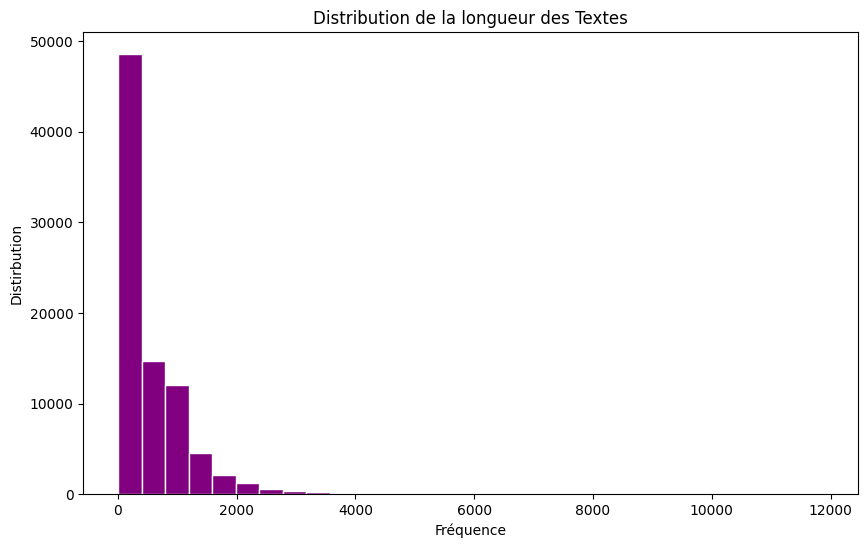

In [38]:
import matplotlib.pyplot as plt

# Calcul des différentes longueurs de texte
text_long = df['text'].apply(len)

# Visualisation
plt.figure(figsize = (10, 6))
plt.hist(text_long, bins = 30, color = 'purple', edgecolor = 'white')
plt.title('Distribution de la longueur des Textes')
plt.xlabel('Fréquence')
plt.ylabel('Distirbution')
plt.show()


D'après cet histogramme, comme nous l'avons vu dans les étapes d'analyse et de visualisation des données, la distribution varie fortement avec un pic apparent pour les textes de taille moyenne. Nous avons ainsi une grande diversité dans la quantité des textes par ligne, nous devrons y faire attention pour les modèles de deep learning qui peuvent nécessaiter une longueur d'entrée uniforme.

In [30]:
!pip install wordcloud

  Using cached wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl (168 kB)


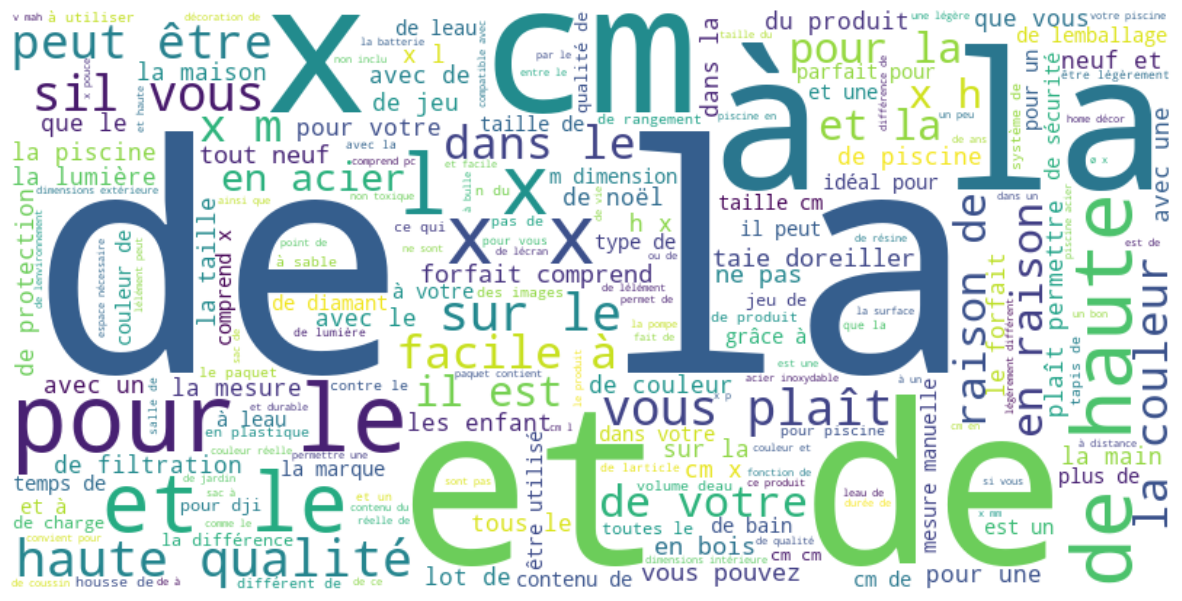

In [39]:
from wordcloud import WordCloud

# Texte complet
full_text = ' '.join(df['text'])

# Nuage de mots
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(full_text)

# Visualisation
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Comme vu dans l'analyse de nos données, nous avons bien une distribution de mots qui n'apporteront rien au modèle et qui peuvent ainsi être supprimer lors de l'entrainement avec nos modèles.

In [40]:
# Nous allons vérfier au préalable qu'il n'y a bien plus de balises HTML, URLs, et d'accents
def html_tags(text):
    return bool(re.search(r'<[^>]+>', text))

def urls(text):
    return bool(re.search(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))

def accents(text):
    return bool(re.search(r'[àáâãäåçèéêëìíîïðñòóôõöùúûüýÿ]', text))

# Application sur un échantillon pour plus de rapidité
sample_data = df['text'].sample(100)
html_tags = sample_data.apply(html_tags).sum()
urls = sample_data.apply(urls).sum()
accents = sample_data.apply(accents).sum()

html_tags, urls, accents


(0, 0, 76)

Nous pouvons en déduire qu'il n'y a plus de balises HTML, ni d'URLs mais il y a la présence d'accents sur certains mots. Pour le deep learning et en particuliers pour les architectures modernes comme les réseaux de neuronnes profonds ou les transformers que nous pourrions utiliser par la suite, les caractères contenant un accent ne posent pas de problème, nous pouvons donc les garder. De même pour la traduction qui nous posait problème car elle demandait beaucoup de ressources en terme de temps. La plupart des modèles de traitement du langage naturel modernes peuvent être entrainés sur de vastes corpus multilingues.
Les accents ne poseront pas non plus de soucis pour la tokénisation, ce qui nous permet ainsi de garder la richesse linguistique des données et peut être bénéfique pour la performance de nos modèles par la suite.

### Tokenisation du texte

In [36]:
!pip install nltkimport nltk

ERROR: Could not find a version that satisfies the requirement nltkimport (from versions: none)
ERROR: No matching distribution found for nltkimport


In [42]:
import nltk
from nltk.tokenize import word_tokenize

# Downmoad des ressources nltk pour la tokénisation
nltk.download('punkt')

# Fonction de tokénisation
def tokenize_text(text):
    tokens = word_tokenize(text, language = 'french')
    return tokens

# Application à la colonne 'text'
df['tokens'] = df['text'].apply(tokenize_text)

# Visualisation
df['tokens'].head()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shawnspenstar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [olivia, personalisiertes, notizbuch, seiten, ...
1    [journal, des, arts, le, n, du, lart, et, son,...
2    [grand, stylet, ergonomique, bleu, gamepad, ni...
3    [peluche, donald, europe, disneyland, marionne...
4    [la, guerre, des, tuques, luc, a, des, idées, ...
Name: tokens, dtype: object

In [43]:
# Premier nettoyage du texte avec les stopwords français, car la majorité du text est en FR

from nltk.corpus import stopwords
from collections import Counter

# Download des stopwords
nltk.download('stopwords')

# Stopwords français
french_stopwords = set(stopwords.words('french'))

# Fonctions
def remove_stopwords_fr(tokens):
    return [token for token in tokens if token not in french_stopwords]

# Application
df['tokens'] = df['tokens'].apply(remove_stopwords_fr)

# Compter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 20 mots els plus fréquents
print(word_counts.most_common(20))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shawnspenstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('x', 91884), ('cm', 56192), ('couleur', 24227), ('taille', 24031), ('a', 23757), ('piscine', 22594), ('plus', 22417), ('peut', 21180), ('haute', 18591), ('qualité', 16685), ('mm', 15487), ('être', 15467), ('the', 14587), ('facile', 13076), ('enfants', 12610), ('tout', 12608), ('matériel', 12516), ('produit', 12102), ('and', 12049), ('sans', 12020)]


Il y a encore des chiffres et des mots qui sont à supprimer.

In [44]:
# Liste supplémentaire de mots à filtrer
add_stopwords = {'x', 'cm', 'mm', 'the', 'and'}

# Maj fonction
def remove_stopwords_2(tokens):
    return [token for token in tokens if token not in add_stopwords]

# Application
df['tokens'] = df['tokens'].apply(remove_stopwords_2)

# Recompter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 50 mots les plus fréquents
print(word_counts.most_common(50))


[('couleur', 24227), ('taille', 24031), ('a', 23757), ('piscine', 22594), ('plus', 22417), ('peut', 21180), ('haute', 18591), ('qualité', 16685), ('être', 15467), ('facile', 13076), ('enfants', 12610), ('tout', 12608), ('matériel', 12516), ('produit', 12102), ('sans', 12020), ('dimensions', 11674), ('jeu', 11161), ('bois', 10931), ('leau', 10537), ('caractéristiques', 9996), ('h', 9966), ('acier', 9900), ('sil', 9851), ('pc', 9816), ('plaît', 9668), ('comme', 9592), ('coussin', 9283), ('lumière', 9070), ('comprend', 8941), ('type', 8793), ('non', 8631), ('très', 8556), ('décoration', 8555), ('batterie', 8498), ('taie', 8366), ('g', 8357), ('led', 8345), ('cette', 8344), ('of', 7865), ('dun', 7777), ('v', 7719), ('bébé', 7714), ('to', 7706), ('poids', 7625), ('dune', 7533), ('blanc', 7453), ('mode', 7361), ('sac', 7359), ('raison', 7245), ('protection', 7210)]


La liste des mots les plus fréquents montre maintenant des termes plus pertinents pour des descriptions de produits, tels que "couleur", "taille", "qualité", "matériel", et "produit". Mais il reste encore des mots comme "a", "peut", "être", et "plus" qui sont relativement vagues et pourraient ne pas ajouter beaucoup de valeur pour la modélisation.

In [45]:
# Liste mise à jour de mots à filtrer
add_stopwords_2 = {'a', 'peut', 'être', 'plus', 'tout', 'leau'}
# Maj fonction
def remove_stopwords_3(tokens):
    return [token for token in tokens if token not in add_stopwords_2]

# Application
df['tokens'] = df['tokens'].apply(remove_stopwords_3)

# Recompter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 150 mots les plus fréquents
print(word_counts.most_common(50))


[('couleur', 24227), ('taille', 24031), ('piscine', 22594), ('haute', 18591), ('qualité', 16685), ('facile', 13076), ('enfants', 12610), ('matériel', 12516), ('produit', 12102), ('sans', 12020), ('dimensions', 11674), ('jeu', 11161), ('bois', 10931), ('caractéristiques', 9996), ('h', 9966), ('acier', 9900), ('sil', 9851), ('pc', 9816), ('plaît', 9668), ('comme', 9592), ('coussin', 9283), ('lumière', 9070), ('comprend', 8941), ('type', 8793), ('non', 8631), ('très', 8556), ('décoration', 8555), ('batterie', 8498), ('taie', 8366), ('g', 8357), ('led', 8345), ('cette', 8344), ('of', 7865), ('dun', 7777), ('v', 7719), ('bébé', 7714), ('to', 7706), ('poids', 7625), ('dune', 7533), ('blanc', 7453), ('mode', 7361), ('sac', 7359), ('raison', 7245), ('protection', 7210), ('inclus', 7208), ('main', 7160), ('rc', 7120), ('temps', 7072), ('ans', 7056), ('mesure', 6990)]


Cette liste actualisée de mots fréquents semble déjà plus pertinente pour des descriptions de produits, bien qu'il y ait encore quelques mots qui pourraient ne pas être très utiles pour le modèle, comme "sil", "plaît", et "comme". Ces mots pourraient être considérés comme des remplisseurs dans notre contexte.

In [46]:
# Liste mise à jour de mots à filtrer
add_stopwords_3 = {'sil', 'plaît', 'comme', 'h', 'pc'}

# Maj fonction
def remove_stopwords_4(tokens):
    return [token for token in tokens if token not in add_stopwords_3]

# Appliquer
df['tokens'] = df['tokens'].apply(remove_stopwords_4)

# Recompter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 50 mots les plus fréquents
print(word_counts.most_common(50))


[('couleur', 24227), ('taille', 24031), ('piscine', 22594), ('haute', 18591), ('qualité', 16685), ('facile', 13076), ('enfants', 12610), ('matériel', 12516), ('produit', 12102), ('sans', 12020), ('dimensions', 11674), ('jeu', 11161), ('bois', 10931), ('caractéristiques', 9996), ('acier', 9900), ('coussin', 9283), ('lumière', 9070), ('comprend', 8941), ('type', 8793), ('non', 8631), ('très', 8556), ('décoration', 8555), ('batterie', 8498), ('taie', 8366), ('g', 8357), ('led', 8345), ('cette', 8344), ('of', 7865), ('dun', 7777), ('v', 7719), ('bébé', 7714), ('to', 7706), ('poids', 7625), ('dune', 7533), ('blanc', 7453), ('mode', 7361), ('sac', 7359), ('raison', 7245), ('protection', 7210), ('inclus', 7208), ('main', 7160), ('rc', 7120), ('temps', 7072), ('ans', 7056), ('mesure', 6990), ('neuf', 6868), ('description', 6823), ('style', 6817), ('maison', 6798), ('design', 6785)]


La liste de mots fréquents révisée montre une gamme de termes qui semblent très pertinents pour les descriptions de produits, avec des mots techniques et spécifiques comme "couleur", "taille", "acier", "lumière", et "batterie". Cependant, certains mots comme "of", "to", "cette", et "dun" pourraient encore être considérés comme des remplisseurs dans notre contexte.

In [47]:
# Liste mise à jour de mots à filtrer
final_stopwords = {'of', 'to', 'cette', 'dun', 'dune'}

# Maj fonction
def final_refine_tokens(tokens):
    return [token for token in tokens if token not in final_stopwords]

# Appliquer
df['tokens'] = df['tokens'].apply(final_refine_tokens)

# Recompter les mots restants
word_counts = Counter([token for sublist in df['tokens'] for token in sublist])

# Visualisation des 50 mots les plus fréquents
print(word_counts.most_common(50))


[('couleur', 24227), ('taille', 24031), ('piscine', 22594), ('haute', 18591), ('qualité', 16685), ('facile', 13076), ('enfants', 12610), ('matériel', 12516), ('produit', 12102), ('sans', 12020), ('dimensions', 11674), ('jeu', 11161), ('bois', 10931), ('caractéristiques', 9996), ('acier', 9900), ('coussin', 9283), ('lumière', 9070), ('comprend', 8941), ('type', 8793), ('non', 8631), ('très', 8556), ('décoration', 8555), ('batterie', 8498), ('taie', 8366), ('g', 8357), ('led', 8345), ('v', 7719), ('bébé', 7714), ('poids', 7625), ('blanc', 7453), ('mode', 7361), ('sac', 7359), ('raison', 7245), ('protection', 7210), ('inclus', 7208), ('main', 7160), ('rc', 7120), ('temps', 7072), ('ans', 7056), ('mesure', 6990), ('neuf', 6868), ('description', 6823), ('style', 6817), ('maison', 6798), ('design', 6785), ('kg', 6741), ('pcs', 6741), ('pompe', 6688), ('hauteur', 6667), ('deau', 6639)]


In [48]:
df.head()

,designation,description,productid,imageid,target,text,tokens
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,0,olivia personalisiertes notizbuch seiten pu...,"[olivia, personalisiertes, notizbuch, seiten, ..."
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,1,journal des arts le n du lart et son marche...,"[journal, arts, lart, marche, salon, dart, asi..."
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,2,grand stylet ergonomique bleu gamepad nintendo...,"[grand, stylet, ergonomique, bleu, gamepad, ni..."
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,3,peluche donald europe disneyland marionnett...,"[peluche, donald, europe, disneyland, marionne..."
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,4,la guerre des tuques luc a des idées de grande...,"[guerre, tuques, luc, idées, grandeur, veut, o..."


La liste finale des mots fréquents après la suppression des mots peu informatifs est très pertinente pour le contexte des descriptions de produits. Elle comprend des termes spécifiques qui sont susceptibles de contribuer de manière significative à la classification.

In [35]:
# Sauvegarde du dataset
df.to_csv('tokenization_text_1.csv', index = True)

### Utilisation des transformers

In [55]:
!pip install transformers torch



  Using cached transformers-4.40.1-py3-none-any.whl.metadata (137 kB)
  Using cached filelock-3.13.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached huggingface_hub-0.22.2-py3-none-any.whl.metadata (12 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached transformers-4.40.1-py3-none-any.whl (9.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 5.9 MB/s eta 0:00:0000:0100:01
Using cached huggingface_hub-0.22.2-py3-none-any.whl (388 kB)
Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.3/410.3 kB 8.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.1 MB/s eta 0:00:00a 0:00:01
Using cached filelock-3.13.4-py3-none-any.whl (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.4 MB/s eta 0:00:00a 0:00:01m
Using cached sympy-1.12-

In [60]:
!pip install scikit-learn

  Using cached scikit_learn-1.4.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-macosx_12_0_arm64.whl (10.5 MB)
Using cached scipy-1.13.0-cp311-cp311-macosx_12_0_arm64.whl (30.3 MB)
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)


### Partie avec le modele DNN (Réseau de neurones profonds)

In [35]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached grp

Nous allons créer un dictionnaire avec les 20 000 mots les plus courants dans les données d'entrainement, les autres seront ignorés ou remplacés par un token spécial 'unknow'.
Nous allons ensuite convertir les textes en séquences d'indices et appliquer un padding afin d'obtenir des séquences uniformes de 400 mots.

Rappel :

Embeddings de texte :
Les embeddings de texte sont une méthode pour convertir des tokens en vecteurs de nombres. Chaque mot dans le dictionnaire est mappé à un vecteur dense de valeurs flottantes, lequel est appris pendant l'entraînement du modèle. Ces vecteurs essaient de capturer les relations sémantiques entre les mots. Par exemple, des mots aux significations similaires auront des vecteurs également similaires.
Padding :

Le padding est utilisé pour s'assurer que toutes les entrées textuelles dans le modèle ont la même longueur. Cela est nécessaire parce que les modèles de deep learning, en particulier ceux qui utilisent des réseaux neuronaux, ont besoin d'entrées de taille uniforme. Si un texte est trop court, on ajoute des zéros (ou un autre token spécifique) à la fin jusqu'à ce qu'il atteigne la longueur requise.

In [36]:
df.head()

,designation,description,productid,imageid,target,text,tokens
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,0,olivia personalisiertes notizbuch seiten pu...,"[olivia, personalisiertes, notizbuch, seiten, ..."
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,1,journal des arts le n du lart et son marche...,"[journal, arts, lart, marche, salon, dart, asi..."
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,2,grand stylet ergonomique bleu gamepad nintendo...,"[grand, stylet, ergonomique, bleu, gamepad, ni..."
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,3,peluche donald europe disneyland marionnett...,"[peluche, donald, europe, disneyland, marionne..."
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,4,la guerre des tuques luc a des idées de grande...,"[guerre, tuques, luc, idées, grandeur, veut, o..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   target       84916 non-null  int64 
 5   text         84916 non-null  object
 6   tokens       84916 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.2+ MB


In [49]:
# Conversion de la colonne 'target' en entier
df['target'] = df['target'].astype(int)

# Vérification
df['target'].dtype


dtype('int64')

In [50]:
# Répartition des ensembles d'entrainement et de test
from sklearn.model_selection import train_test_split

X = df['tokens'].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Nombre total de mots uniques : 169998


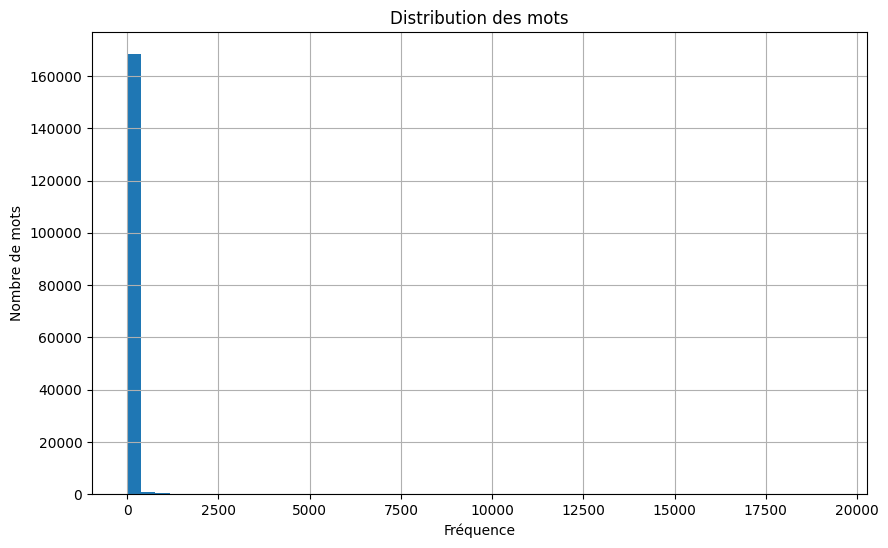

Longueur maximale de séquence : 1079
Longueur moyenne de séquence : 54.3551051051051


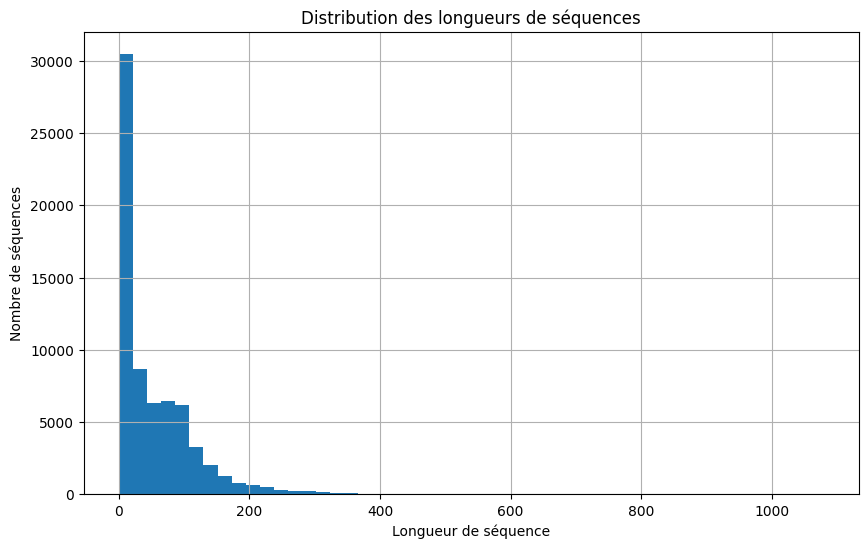

In [51]:
from collections import Counter

# Comptage du nombre total de mots uniques
word_counts = Counter([word for sublist in X_train for word in sublist])
print("Nombre total de mots uniques :", len(word_counts))

# Visualisation de la fréquence des mots
plt.figure(figsize = (10, 6))
plt.hist(word_counts.values(), bins = 50)
plt.title("Distribution des mots")
plt.xlabel("Fréquence")
plt.ylabel("Nombre de mots")
plt.grid(True)
plt.show()

# Analyse
sequence_lengths = [len(seq) for seq in X_train]
print("Longueur maximale de séquence :", max(sequence_lengths))
print("Longueur moyenne de séquence :", sum(sequence_lengths) / len(sequence_lengths))

# Tracer l'histogramme des longueurs de séquences
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50)
plt.title("Distribution des longueurs de séquences")
plt.xlabel("Longueur de séquence")
plt.ylabel("Nombre de séquences")
plt.grid(True)
plt.show()


#### Détermination des variables max_words et max_len :

Pour max_words :

Nous avons un très grand nombre de mots uniques dans notre ensemble de données, nous allons donc prendre un sous-ensemble reprenant les plus fréquents. Nous allons commencer par prendre 20 000 et allons voir jusqu'à 50 000 si nous voyons une amélioration dans les performances de notre modèle.

Pour max_len :

La longueur maximale de séquence est de 1079 mots, et nous pouvons d'ailleurs voir que la plupart des séquences sont relativement longues. Nous avons aussi calculé la longueur moyenne de séquence qui est de 54 mots, ce qui nous permet de penser que nous avons une grande variabilité de longueur parmis nos séquences. Nous devons essayer de trouver un juste milieu entre prendre un maximum des séquences et eviter un gaspillage de ressources lors de l'apprentissage de notre modèle (notamment le temps). Nous allons tester une valeur max_len autour de 100 à 150 (correspondants à 2 à 3 fois la longueur moyenne de séquence de notre ensemble).

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Configuration du Tokenizer
max_words = 20000  # On commence par les 20 000 mots les plus fréquents
max_len = 100      # On commence par une longueur fixe des séquences de 100

tokenizer = Tokenizer(filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(X_train)


# Application du tokenizer sur X_train et X_test
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Application du padding
X_train_pad = pad_sequences(X_train_seq, maxlen = max_len, padding = 'post')
X_test_pad = pad_sequences(X_test_seq, maxlen = max_len, padding = 'post')

## le padding (ajout de zéros ou d'un autre token spécifique) 
## doit être effectué à la fin de chaque séquence de données jusqu'à ce qu'elle atteigne une longueur uniforme nécessaire 
## pour l'entrée dans le réseau de neurones.

### Premier modele = modele Conv1D

In [53]:
# Construction du modèle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras import layers

embedding_dim = 200

model = Sequential()
model.add(layers.Embedding(vocab_size, output_dim = embedding_dim, input_length = max_len))
model.add(layers.SpatialDropout1D(0.5))
model.add(layers.Conv1D(64, 2, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(27, activation = 'softmax'))

# Compilation du modèle
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Résumé du modèle
model.summary()

# Configuration du Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss', # On surveille la perte de validation
    patience = 3, # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose = 1,
    restore_best_weights = True # Restaurer les meilleurs poids trouvés durant l'entraînement
)

# Entraînement du modèle
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs = 10, 
    batch_size = 1000, 
    validation_data = (X_test_pad, y_test),
    verbose = 1,
    callbacks = [early_stopping]
)

/Users/shawnspenstar/.local/share/virtualenvs/shawnspenstar-3_yDpN33/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - accuracy: 0.1463 - loss: 3.0221 - val_accuracy: 0.4621 - val_loss: 2.1608
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - accuracy: 0.5089 - loss: 1.9387 - val_accuracy: 0.6367 - val_loss: 1.3494
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.6802 - loss: 1.2062 - val_accuracy: 0.7215 - val_loss: 1.0050
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - accuracy: 0.7687 - loss: 0.8444 - val_accuracy: 0.7548 - val_loss: 0.8582
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.8294 - loss: 0.6324 - val_accuracy: 0.7731 - val_loss: 0.7816
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - accuracy: 0.8711 - loss: 0.4806 - val_accuracy: 0.7824 - val_loss: 0.7408
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.9027 - loss: 0.3686 - val_accuracy: 0.7913 - val_loss: 0.7186
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.9287 - loss: 0.2827 - val_accu

531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7926 - loss: 0.7093
Test accuracy: 0.7914507985115051


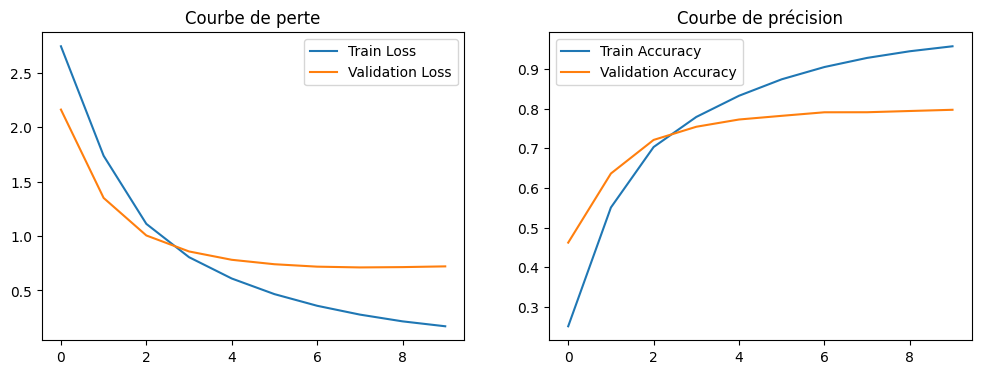

In [54]:
# Evaluation du modele
score = model.evaluate(X_test_pad, 
                       y_test, 
                       verbose = 1)
print("Test accuracy:", score[1])

# Visualisation
plt.figure(figsize = (12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Courbe de perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Courbe de précision')
plt.legend()

plt.show()


Observations :

Précision et perte : La précision sur l'ensemble d'entraînement augmente progressivement au fil des époques, tandis que la perte diminue. Cela indique que ton modèle apprend efficacement à partir des données d'entraînement.

Performance sur l'ensemble de validation : La précision sur l'ensemble de validation (val_accuracy) atteint environ 79%, ce qui est assez décent. Le modèle généralise bien sur des données qu'il n'a pas vu pendant l'entraînement.

La précision sur l'ensemble de validation reste relativement stable, il ne semble pas y avoir de surapprentissage.

531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.41      0.63      0.50       612
           1       0.68      0.72      0.70       942
           2       0.80      0.75      0.77       357
           3       0.63      0.60      0.62       961
           4       0.74      0.62      0.67       517
           5       0.91      0.92      0.92       991
           6       0.69      0.71      0.70       462
           7       0.82      0.84      0.83      1013
           8       0.65      0.50      0.57       424
           9       0.91      0.91      0.91       841
          10       0.75      0.73      0.74       986
          11       0.75      0.77      0.76       539
          12       0.96      0.97      0.97      2047
          13       0.72      0.55      0.63       146
          14       0.84      0.87      0.85       974
          15       0.76      0.77      0.76       306
          16       0.91      0.92      0

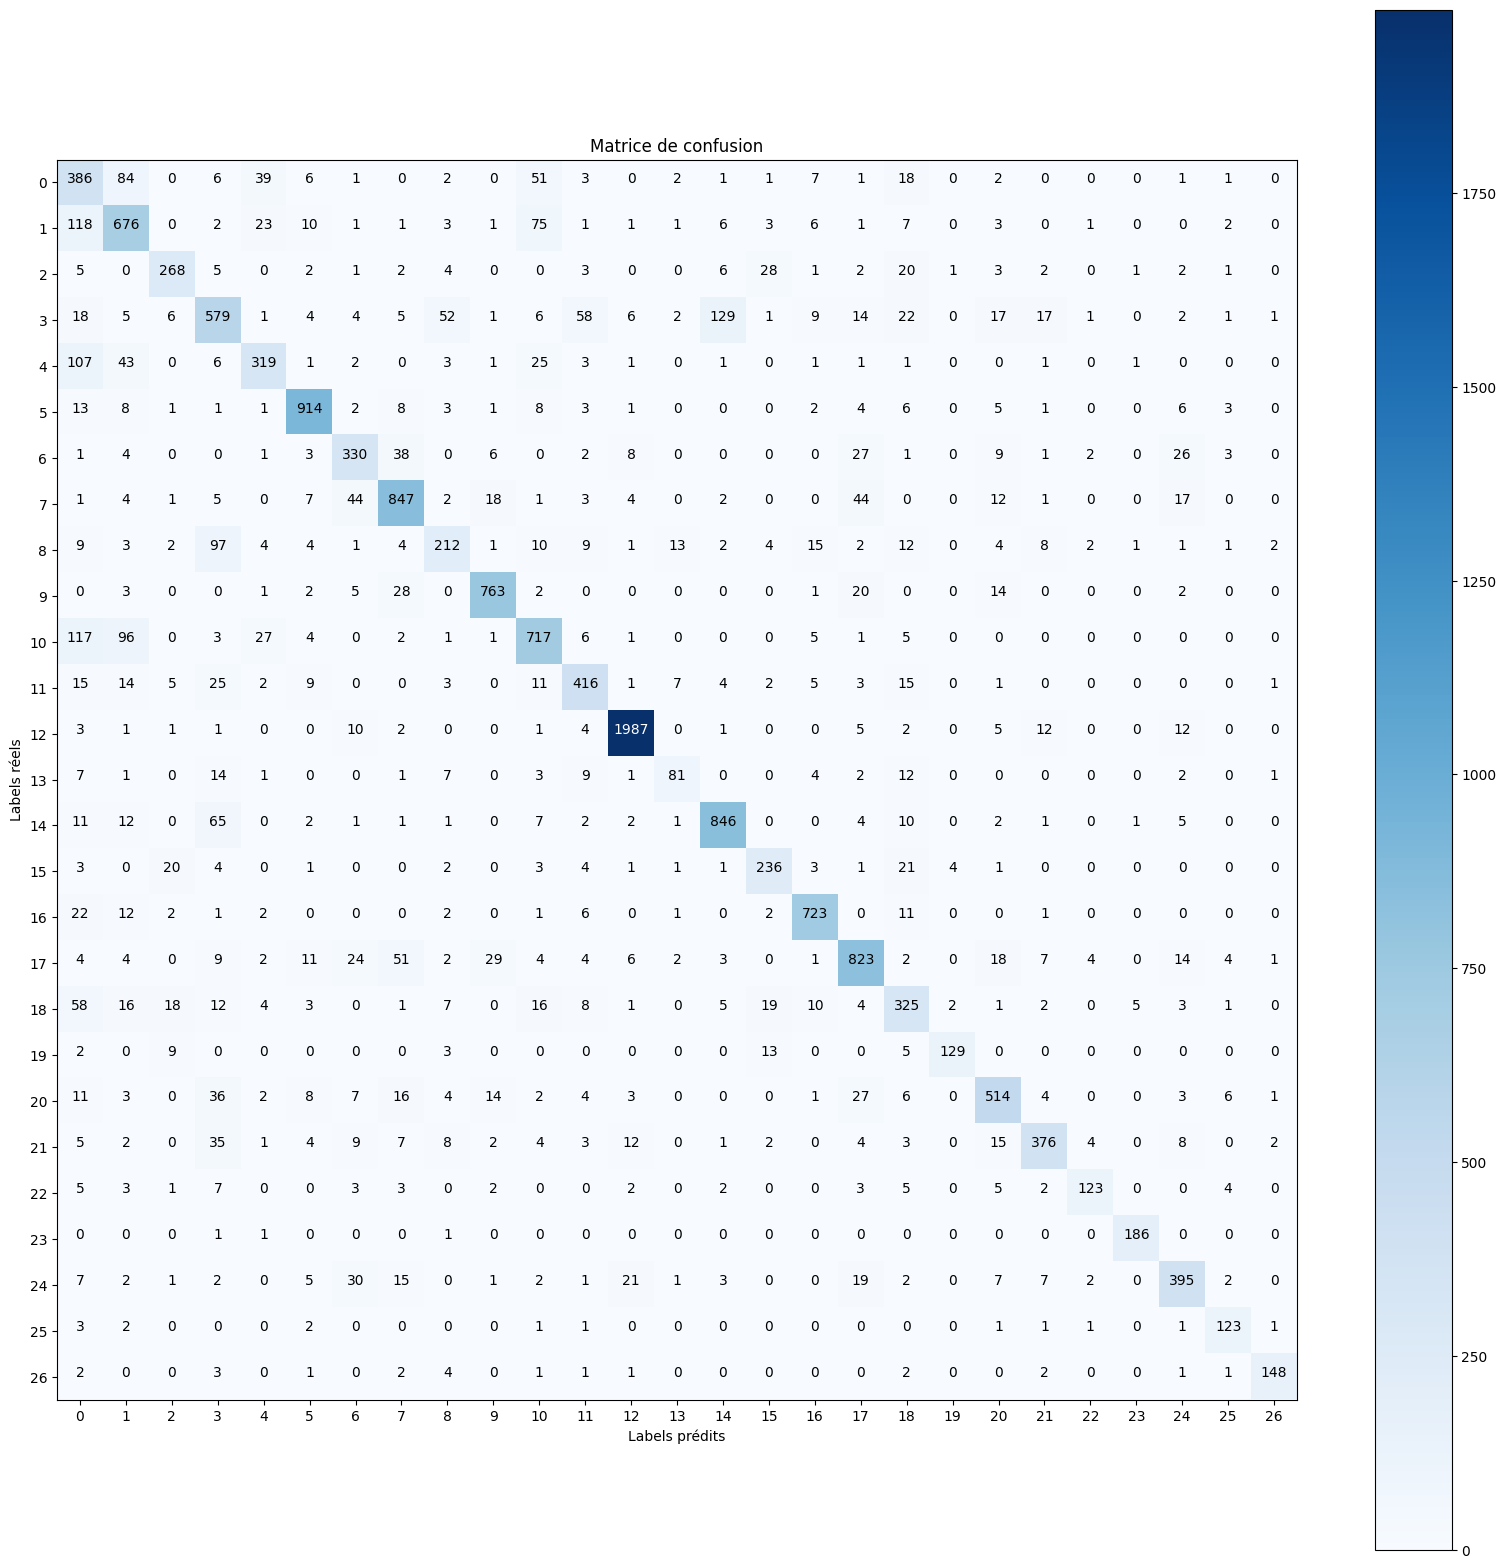

La classe 0 a souvent été prise pour la classe 1.
La classe 0 a souvent été prise pour la classe 4.
La classe 0 a souvent été prise pour la classe 10.
La classe 1 a souvent été prise pour la classe 0.
La classe 1 a souvent été prise pour la classe 4.
La classe 1 a souvent été prise pour la classe 10.
La classe 2 a souvent été prise pour la classe 15.
La classe 3 a souvent été prise pour la classe 8.
La classe 3 a souvent été prise pour la classe 11.
La classe 3 a souvent été prise pour la classe 14.
La classe 3 a souvent été prise pour la classe 18.
La classe 4 a souvent été prise pour la classe 0.
La classe 4 a souvent été prise pour la classe 1.
La classe 4 a souvent été prise pour la classe 10.
La classe 6 a souvent été prise pour la classe 7.
La classe 6 a souvent été prise pour la classe 17.
La classe 6 a souvent été prise pour la classe 24.
La classe 7 a souvent été prise pour la classe 6.
La classe 7 a souvent été prise pour la classe 17.
La classe 8 a souvent été prise pour la 

In [55]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

# Prédiction sur les données de test
y_pred = model.predict(X_test_pad)
test_pred_class = y_pred.argmax(axis = 1)
y_test_class = y_test

# Rapport de classification
print(classification_report(y_test_class, test_pred_class))

# Marice de confusion
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)
classes = range(0, 27) # nombre de classes : 27

# Affichage matrice de confusion
plt.figure(figsize = (20, 20))
plt.imshow(cnf_matrix, interpolation = 'nearest', cmap = 'Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotation dans chaque cellule de la matrice de confusion
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > (cnf_matrix.max() / 2) else "black")

plt.ylabel('Labels réels')
plt.xlabel('Labels prédits')
plt.show()

# Identification des cas fréquents de confusion
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if cnf_matrix[i, j] > 20 and i != j:
        print(f"La classe {i} a souvent été prise pour la classe {j}.")


Précision, rappel et score F1 : Les résultats sont plutôt bons, pour la classe 0 nous voyons que les résultats sont proches des 50%. Regarder à quoi correspondant la classe 0 selon nos premières interprétations des noms des catégories.

Nous voyons que les classes sont relativement déséquilibrés (support).

Notre modèle fonctionne bien dans l'ensemble, mais certaines classes pourraient être amélioré.

### deuxième modele : une architecture de réseau de neurones séquentielle typique pour la classification de texte

In [56]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, GlobalMaxPooling1D

embedding_dim = 200
dropout_rate = 0.5

model = Sequential()
model.add(Embedding(vocab_size, output_dim = embedding_dim))
model.add(Dropout(dropout_rate))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(len(np.unique(y_train)), activation = 'softmax'))

# Compilation du modèle
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Résumé du modèle
model.summary()

# Configuration du Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss', # On surveille la perte de validation
    patience = 3, # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose = 1,
    restore_best_weights = True # Restaurer les meilleurs poids trouvés durant l'entraînement
)

# Entraînement du modèle
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs = 10, 
    batch_size = 100, 
    validation_data = (X_test_pad, y_test),
    verbose = 1,
    callbacks = [early_stopping]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
376/680 ━━━━━━━━━━━━━━━━━━━━ 29s 99ms/step - accuracy: 0.1826 - loss: 2.8844

KeyboardInterrupt: 

Observations :

Précision et perte : La précision sur l'ensemble d'entraînement augmente de manière significative, notre modèle apprend efficacement à partir des données d'entraînement. Et nous avons bien la perte qui diminue également (le modèle converge correctement).

Nous arrivons à presque atteindre les 80% correspondant à notre objectif, notre modèle généralise bien sur les données qu'il n'a pas vu lors de l'entrainement.
La précision sur l'ensemble de validation reste stable tout du long, il n'y a pas de signe d'overfitting.

531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.8009 - loss: 0.7009
Test accuracy: 0.8001648783683777


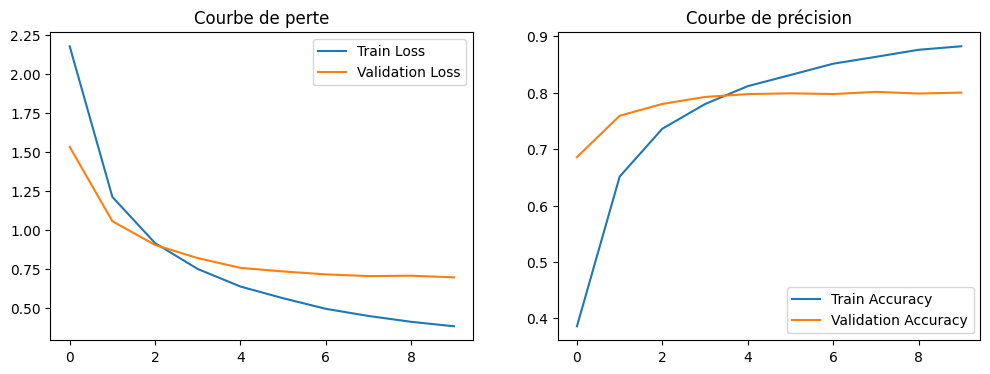

In [47]:
# Evaluation du modele
score = model.evaluate(X_test_pad, 
                       y_test, 
                       verbose = 1)
print("Test accuracy:", score[1])

# Visualisation
plt.figure(figsize = (12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Courbe de perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Courbe de précision')
plt.legend()

plt.show()


531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
              precision    recall  f1-score   support

           0       0.52      0.47      0.49       612
           1       0.70      0.73      0.71       942
           2       0.78      0.80      0.79       357
           3       0.61      0.67      0.64       961
           4       0.67      0.65      0.66       517
           5       0.94      0.92      0.93       991
           6       0.75      0.72      0.74       462
           7       0.83      0.83      0.83      1013
           8       0.62      0.49      0.55       424
           9       0.92      0.90      0.91       841
          10       0.73      0.74      0.73       986
          11       0.74      0.75      0.74       539
          12       0.97      0.98      0.97      2047
          13       0.67      0.60      0.64       146
          14       0.84      0.90      0.87       974
          15       0.73      0.77      0.75       306
          16       0.92      0.93     

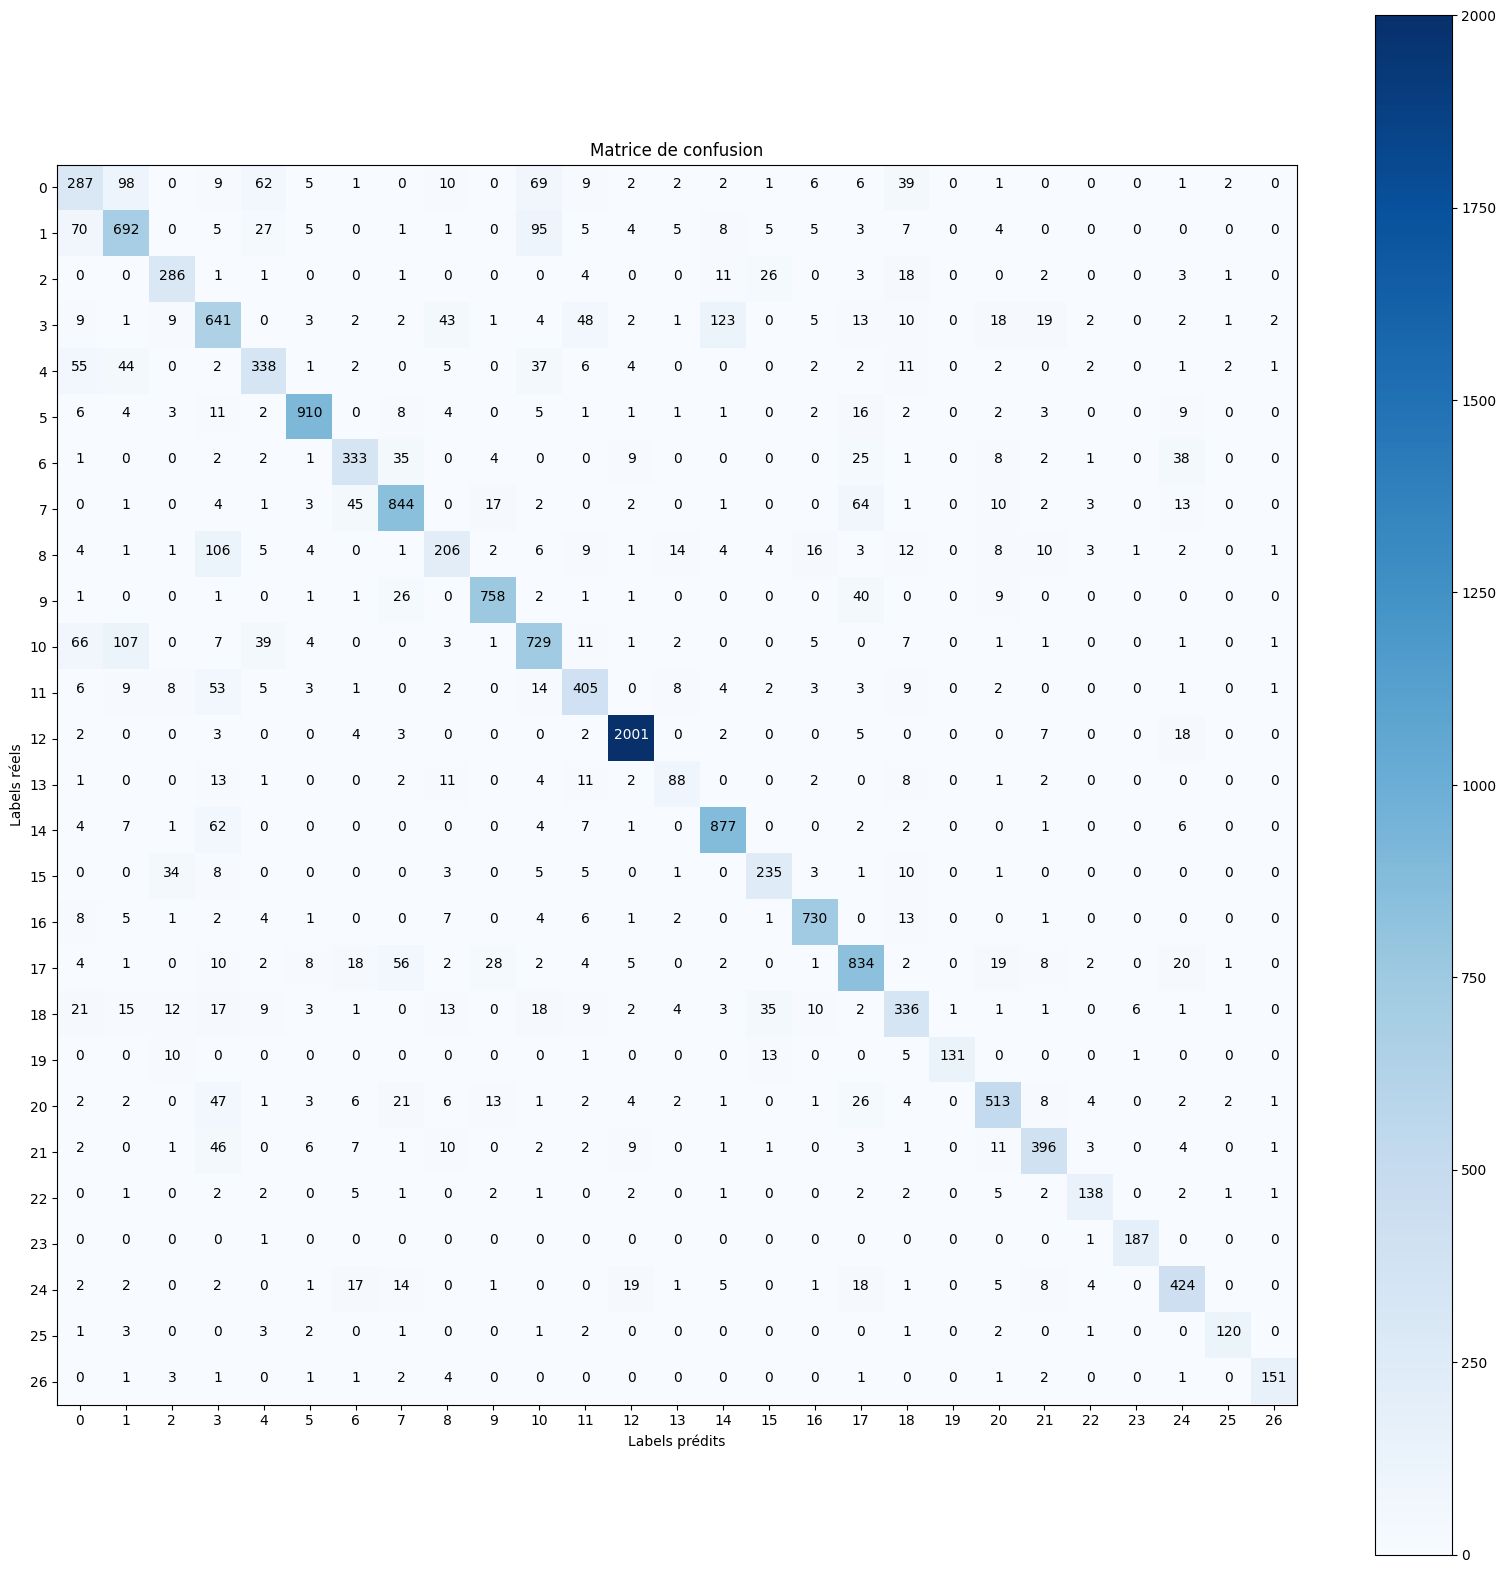

La classe 0 a souvent été prise pour la classe 1.
La classe 0 a souvent été prise pour la classe 4.
La classe 0 a souvent été prise pour la classe 10.
La classe 0 a souvent été prise pour la classe 18.
La classe 1 a souvent été prise pour la classe 0.
La classe 1 a souvent été prise pour la classe 4.
La classe 1 a souvent été prise pour la classe 10.
La classe 2 a souvent été prise pour la classe 15.
La classe 3 a souvent été prise pour la classe 8.
La classe 3 a souvent été prise pour la classe 11.
La classe 3 a souvent été prise pour la classe 14.
La classe 4 a souvent été prise pour la classe 0.
La classe 4 a souvent été prise pour la classe 1.
La classe 4 a souvent été prise pour la classe 10.
La classe 6 a souvent été prise pour la classe 7.
La classe 6 a souvent été prise pour la classe 17.
La classe 6 a souvent été prise pour la classe 24.
La classe 7 a souvent été prise pour la classe 6.
La classe 7 a souvent été prise pour la classe 17.
La classe 8 a souvent été prise pour la 

In [48]:
# Prédiction sur les données de test
y_pred = model.predict(X_test_pad)
test_pred_class = y_pred.argmax(axis = 1)
y_test_class = y_test

# Rapport de classification
print(classification_report(y_test_class, test_pred_class))

# Marice de confusion
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)
classes = range(0, 27) # nombre de classes : 27

# Affichage matrice de confusion
plt.figure(figsize = (20, 20))
plt.imshow(cnf_matrix, interpolation = 'nearest', cmap = 'Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotation dans chaque cellule de la matrice de confusion
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > (cnf_matrix.max() / 2) else "black")

plt.ylabel('Labels réels')
plt.xlabel('Labels prédits')
plt.show()

# Identification des cas fréquents de confusion
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if cnf_matrix[i, j] > 20 and i != j:
        print(f"La classe {i} a souvent été prise pour la classe {j}.")


Notre modèle fonctionne bien dans l'ensemble, avec des performances similaires à notre premier modèle. Regardons avec un autre modèle.

### troisième modele : LSTM

In [50]:
embedding_dim = 200
dropout_rate = 0.5

model = Sequential()
model.add(Embedding(vocab_size, output_dim = embedding_dim))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(128, dropout = 0.5, recurrent_dropout = 0.5))
model.add(Dense(27, activation = 'softmax'))

# Compilation du modèle
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Résumé du modèle
model.summary()

# Configuration du Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss', # On surveille la perte de validation
    patience = 3, # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose = 1,
    restore_best_weights = True # Restaurer les meilleurs poids trouvés durant l'entraînement
)

# Entraînement du modèle
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs = 30, 
    batch_size = 1000, 
    validation_data = (X_test_pad, y_test),
    verbose = 1,
    callbacks = [early_stopping]
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 45s 636ms/step - accuracy: 0.1072 - loss: 3.1480 - val_accuracy: 0.1583 - val_loss: 2.8204
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 44s 646ms/step - accuracy: 0.1537 - loss: 2.8643 - val_accuracy: 0.2030 - val_loss: 2.7020
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 43s 626ms/step - accuracy: 0.1896 - loss: 2.7680 - val_accuracy: 0.2516 - val_loss: 2.5460
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 43s 628ms/step - accuracy: 0.2297 - loss: 2.5985 - val_accuracy: 0.2883 - val_loss: 2.4164
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 43s 635ms/step - accuracy: 0.2579 - loss: 2.5130 - val_accuracy: 0.3222 - val_loss: 2.2589
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 43s 638ms/step - accuracy: 0.3022 - loss: 2.3064 - val_accuracy: 0.3705 - val_loss: 2.0650
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 46s 677ms/step - accuracy: 0.3561 - loss: 2.1262 - val_accuracy: 0.4071 - val_loss: 1.9390
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 48s 707ms/step - accuracy: 0.3816 - loss: 2.0284 - val_accu

531/531 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.7637 - loss: 0.9173
Test accuracy: 0.7627767324447632


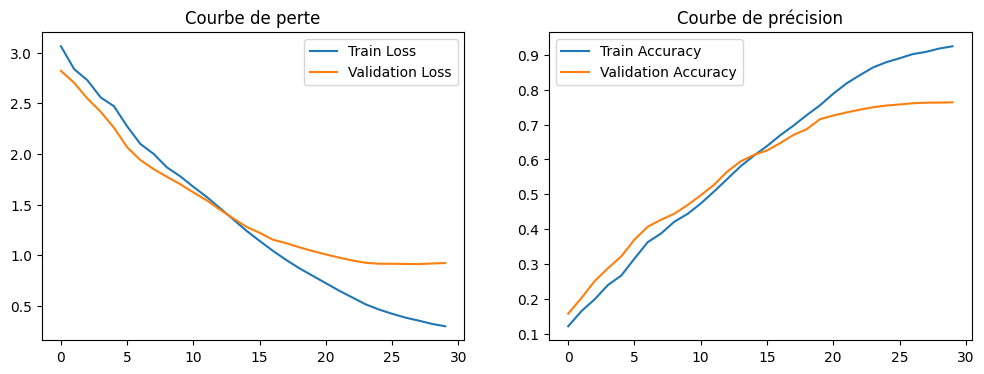

In [51]:
# Evaluation du modele
score = model.evaluate(X_test_pad, 
                       y_test, 
                       verbose = 1)
print("Test accuracy:", score[1])

# Visualisation
plt.figure(figsize = (12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Courbe de perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Courbe de précision')
plt.legend()

plt.show()


### quatrieme modele : modele GRU

In [52]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, GRU, Dense

embedding_dim = 200
dropout_rate = 0.5
max_len = 10

model = Sequential()
model.add(Embedding(vocab_size, output_dim=embedding_dim))
model.add(SpatialDropout1D(0.5))
model.add(GRU(128, dropout = 0.5, recurrent_dropout=0.5))
model.add(Dense(27, activation = 'softmax'))

# Compilation du modèle
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Résumé du modèle
model.summary()

# Configuration du Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss', # On surveille la perte de validation
    patience = 3, # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose = 1,
    restore_best_weights = True # Restaurer les meilleurs poids trouvés durant l'entraînement
)

# Entraînement du modèle
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs = 10, 
    batch_size = 5000, 
    validation_data = (X_test_pad, y_test),
    verbose = 1,
    callbacks = [early_stopping]
)




Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_3             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.0372 - loss: nan - val_accuracy: 0.0360 - val_loss: nan
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.0372 - loss: nan - val_accuracy: 0.0360 - val_loss: nan
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.0364 - loss: nan - val_accuracy: 0.0360 - val_loss: nan
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


In [53]:
vocab_size

169725

### Amélioration du modèle 2 : (embedding_dim up & batch_size up)

In [54]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, GlobalMaxPooling1D

embedding_dim = 300
dropout_rate = 0.5

model = Sequential()
model.add(Embedding(vocab_size, output_dim = embedding_dim, input_length = max_len))
model.add(Dropout(dropout_rate))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(len(np.unique(y_train)), activation = 'softmax'))

# Compilation du modèle
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Résumé du modèle
model.summary()

# Configuration du Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss', # On surveille la perte de validation
    patience = 3, # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose = 1,
    restore_best_weights = True # Restaurer les meilleurs poids trouvés durant l'entraînement
)

# Entraînement du modèle
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs = 10, 
    batch_size = 1000, 
    validation_data = (X_test_pad, y_test),
    verbose = 1,
    callbacks=[early_stopping]
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 204ms/step - accuracy: 0.1203 - loss: 3.1156 - val_accuracy: 0.4050 - val_loss: 2.6793
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.3496 - loss: 2.3846 - val_accuracy: 0.5624 - val_loss: 2.0399
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.5058 - loss: 1.7812 - val_accuracy: 0.6821 - val_loss: 1.6077
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.6125 - loss: 1.4004 - val_accuracy: 0.7348 - val_loss: 1.3146
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.6788 - loss: 1.1496 - val_accuracy: 0.7640 - val_loss: 1.1353
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.7290 - loss: 0.9781 - val_accuracy: 0.7790 - val_loss: 1.0154
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.7642 - loss: 0.8466 - val_accuracy: 0.7883 - val_loss: 0.9223
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.7979 - loss: 0.7303 - val_accu

531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8048 - loss: 0.7746
Test accuracy: 0.8013424277305603


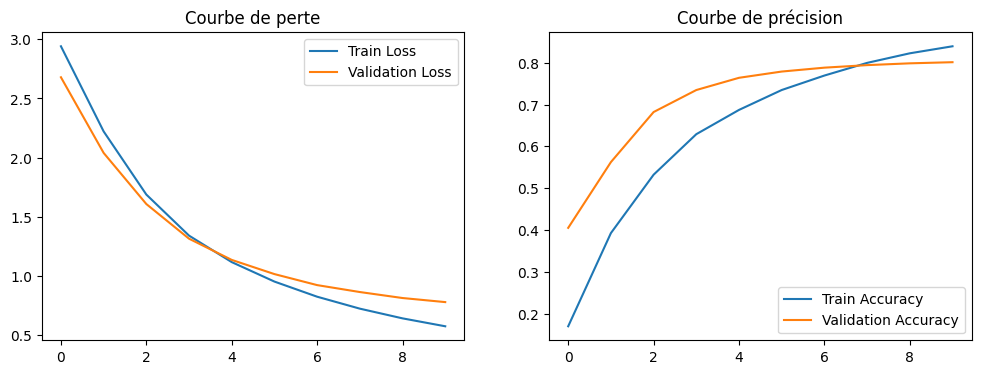

In [55]:
# Evaluation du modele
score = model.evaluate(X_test_pad, 
                       y_test, 
                       verbose = 1)
print("Test accuracy:", score[1])

# Visualisation
plt.figure(figsize = (12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Courbe de perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Courbe de précision')
plt.legend()

plt.show()

### test modele RNN

In [56]:
embedding_dim = 300
dropout_rate = 0.5
max_len = 150

model = Sequential()
model.add(Embedding(vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Dropout(dropout_rate))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(len(np.unique(y_train)), activation = 'softmax'))

# Compilation du modèle
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Résumé du modèle
model.summary()

# Configuration du Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss', # On surveille la perte de validation
    patience = 3, # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose = 1,
    restore_best_weights = True # Restaurer les meilleurs poids trouvés durant l'entraînement
)

# Entraînement du modèle
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs = 10, 
    batch_size = 1000, 
    validation_data = (X_test_pad, y_test),
    verbose = 1,
    callbacks = [early_stopping]
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.1295 - loss: 3.1002 - val_accuracy: 0.4603 - val_loss: 2.5787
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.3970 - loss: 2.2491 - val_accuracy: 0.5876 - val_loss: 1.9322
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.5497 - loss: 1.6582 - val_accuracy: 0.7025 - val_loss: 1.5191
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.6479 - loss: 1.2896 - val_accuracy: 0.7465 - val_loss: 1.2490
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.7090 - loss: 1.0577 - val_accuracy: 0.7664 - val_loss: 1.0819
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - accuracy: 0.7577 - loss: 0.8876 - val_accuracy: 0.7828 - val_loss: 0.9731
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.7930 - loss: 0.7587 - val_accuracy: 0.7913 - val_loss: 0.8930
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.8188 - loss: 0.6662 - val_accu

531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8050 - loss: 0.7581
Test accuracy: 0.8023433685302734


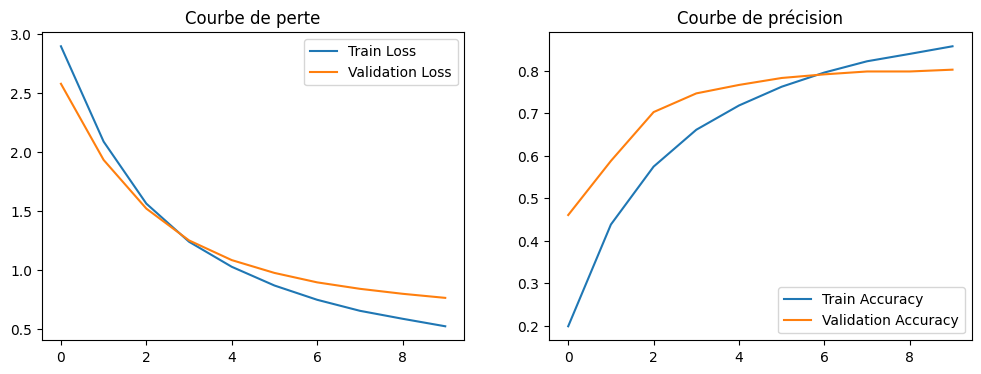

In [57]:
# Evaluation du modele
score = model.evaluate(X_test_pad, 
                       y_test, 
                       verbose = 1)
print("Test accuracy:", score[1])

# Visualisation
plt.figure(figsize = (12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Courbe de perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Courbe de précision')
plt.legend()

plt.show()

### Texte en maximisant max_len et max_words à la tokenisation et padd + entrainement de la dernière version du modele 2

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


X = df['tokens'].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration du Tokenizer
max_words = 30000  # Prendre les 30 000 mots les plus fréquents
max_len = 150      # Longueur fixe des séquences

tokenizer = Tokenizer(filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(X_train)  # Ne construire le vocabulaire qu'à partir des données d'entraînement


# Convertir les textes en séquences d'indices
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Appliquer le padding pour obtenir des séquences de longueur uniforme
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [63]:
from tensorflow.keras import layers, regularizers

embedding_dim = 300
dropout_rate = 0.5
max_len = 150

model = Sequential()
model.add(Embedding(vocab_size, output_dim=embedding_dim))
model.add(Dropout(dropout_rate))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(len(np.unique(y_train)), activation = 'softmax'))

# Compilation du modèle
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Résumé du modèle
model.summary()

# Configuration du Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss', # On surveille la perte de validation
    patience = 3, # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose = 1,
    restore_best_weights = True # Restaurer les meilleurs poids trouvés durant l'entraînement
)

# Entraînement du modèle
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs = 20, 
    batch_size = 1000, 
    validation_data = (X_test_pad, y_test),
    verbose = 1,
    callbacks = [early_stopping]
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - accuracy: 0.1325 - loss: 3.0833 - val_accuracy: 0.4544 - val_loss: 2.5504
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.3974 - loss: 2.2305 - val_accuracy: 0.6136 - val_loss: 1.9527
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 275ms/step - accuracy: 0.5435 - loss: 1.6733 - val_accuracy: 0.7115 - val_loss: 1.5107
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 267ms/step - accuracy: 0.6464 - loss: 1.2841 - val_accuracy: 0.7529 - val_loss: 1.2419
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - accuracy: 0.7173 - loss: 1.0404 - val_accuracy: 0.7728 - val_loss: 1.0756
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - accuracy: 0.7636 - loss: 0.8693 - val_accuracy: 0.7862 - val_loss: 0.9598
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 263ms/step - accuracy: 0.7925 - loss: 0.7609 - val_accuracy: 0.7963 - val_loss: 0.8914
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 266ms/step - accuracy: 0.8204 - loss: 0.6585 - val_accu

531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.8117 - loss: 0.6614
Test accuracy: 0.8120583891868591


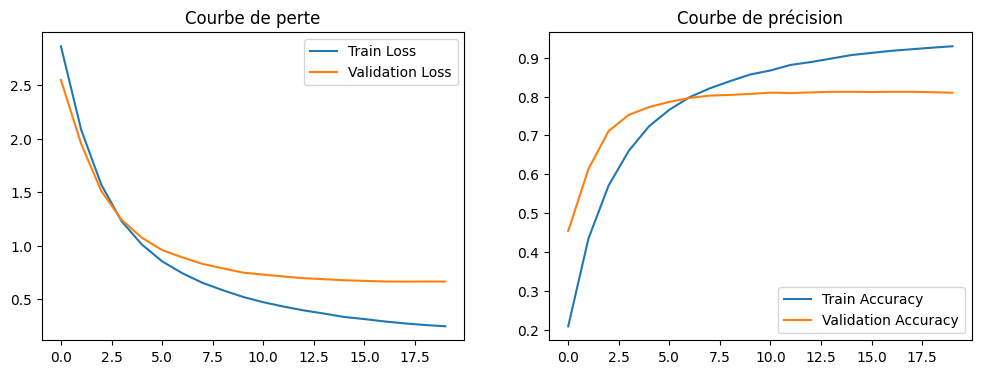

In [64]:
# Evaluation du modele
score = model.evaluate(X_test_pad, 
                       y_test, 
                       verbose = 1)
print("Test accuracy:", score[1])

# Visualisation
plt.figure(figsize = (12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Courbe de perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Courbe de précision')
plt.legend()

plt.show()

### Le modèle que nous selectionnons

In [65]:
# passer le max_len à 200 n'apporte pas de meilleures perf au modèle, on le laisse donc à 150

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


X = df['tokens'].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration du Tokenizer
max_words = 40000  # Prendre les 40 000 mots les plus fréquents
max_len = 150      # Longueur fixe des séquences

tokenizer = Tokenizer(filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(X_train)  # Ne construire le vocabulaire qu'à partir des données d'entraînement


# Convertir les textes en séquences d'indices
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Appliquer le padding pour obtenir des séquences de longueur uniforme
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [66]:
embedding_dim = 300
dropout_rate = 0.5
max_len = 150

model = Sequential()
model.add(Embedding(vocab_size, output_dim=embedding_dim))
model.add(Dropout(dropout_rate))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(len(np.unique(y_train)), activation = 'softmax'))

# Compilation du modèle
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Résumé du modèle
model.summary()

# Configuration du Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss', # On surveille la perte de validation
    patience = 3, # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose = 1,
    restore_best_weights = True # Restaurer les meilleurs poids trouvés durant l'entraînement
)

# Entraînement du modèle
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs = 20, 
    batch_size = 1000, 
    validation_data = (X_test_pad, y_test),
    verbose = 1,
    callbacks = [early_stopping]
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - accuracy: 0.1436 - loss: 3.0644 - val_accuracy: 0.4719 - val_loss: 2.5731
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - accuracy: 0.3847 - loss: 2.2407 - val_accuracy: 0.5987 - val_loss: 1.9622
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - accuracy: 0.5396 - loss: 1.6666 - val_accuracy: 0.7087 - val_loss: 1.5231
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.6468 - loss: 1.2805 - val_accuracy: 0.7513 - val_loss: 1.2405
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.7124 - loss: 1.0479 - val_accuracy: 0.7750 - val_loss: 1.0673
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - accuracy: 0.7572 - loss: 0.8800 - val_accuracy: 0.7882 - val_loss: 0.9578
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - accuracy: 0.7905 - loss: 0.7638 - val_accuracy: 0.7976 - val_loss: 0.8813
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - accuracy: 0.8133 - loss: 0.6742 - val_accu

531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8128 - loss: 0.6540
Test accuracy: 0.813412606716156


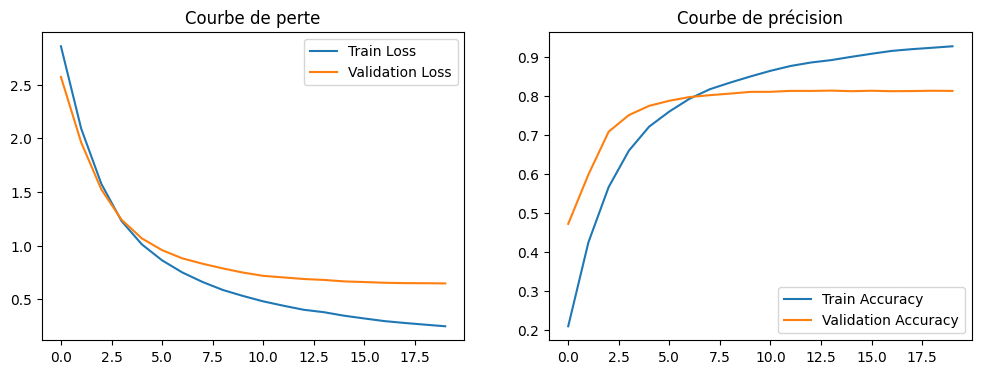

In [67]:
# Evaluation du modele
score = model.evaluate(X_test_pad, 
                       y_test, 
                       verbose = 1)
print("Test accuracy:", score[1])

# Visualisation
plt.figure(figsize = (12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Courbe de perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Courbe de précision')
plt.legend()

plt.show()

531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       612
           1       0.70      0.75      0.72       942
           2       0.82      0.84      0.83       357
           3       0.61      0.71      0.66       961
           4       0.68      0.69      0.69       517
           5       0.93      0.93      0.93       991
           6       0.76      0.75      0.75       462
           7       0.81      0.87      0.84      1013
           8       0.67      0.51      0.58       424
           9       0.91      0.92      0.91       841
          10       0.73      0.75      0.74       986
          11       0.77      0.77      0.77       539
          12       0.97      0.98      0.98      2047
          13       0.69      0.62      0.65       146
          14       0.87      0.88      0.87       974
          15       0.77      0.76      0.77       306
          16       0.93      0.94     

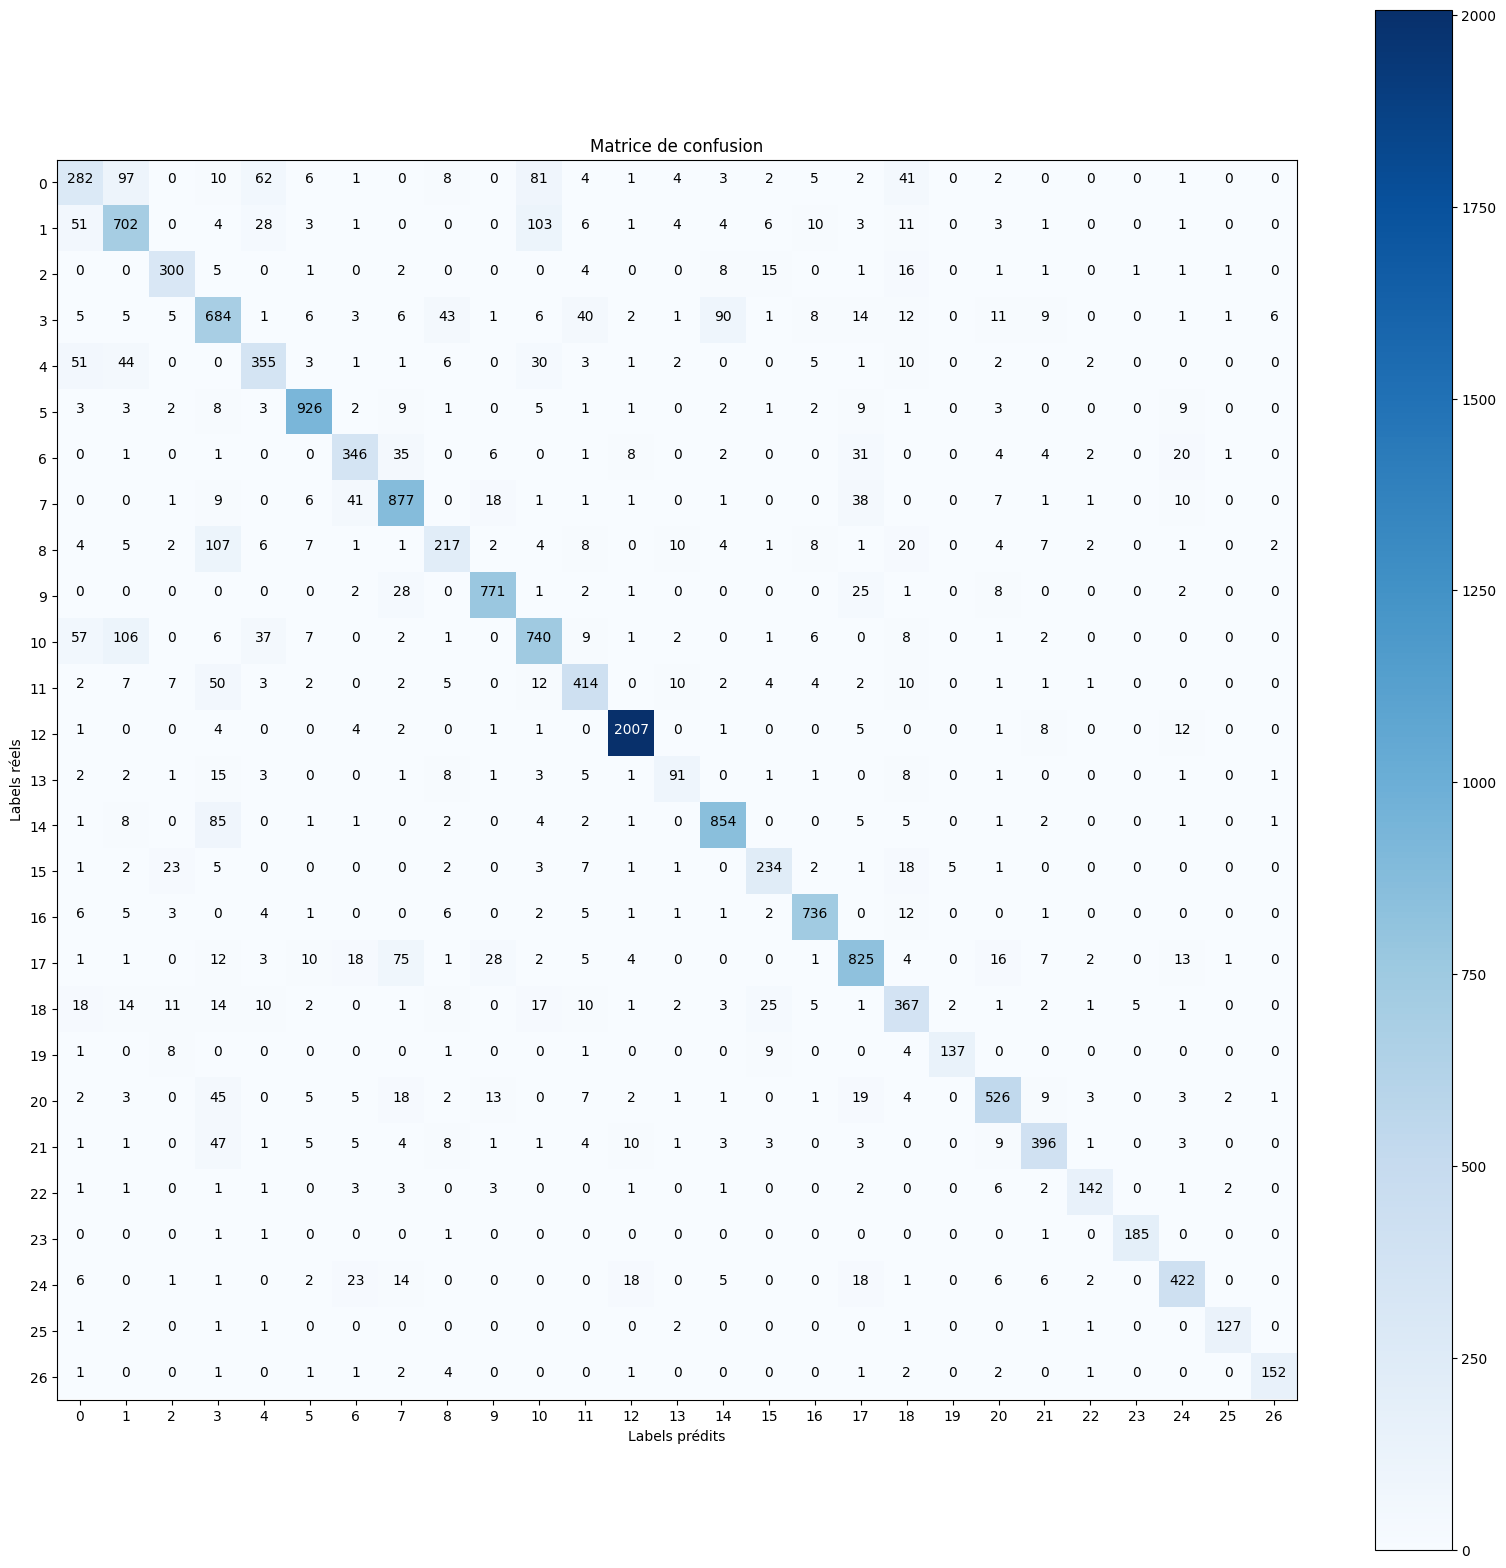

La classe 0 a souvent été prise pour la classe 1.
La classe 0 a souvent été prise pour la classe 4.
La classe 0 a souvent été prise pour la classe 10.
La classe 0 a souvent été prise pour la classe 18.
La classe 1 a souvent été prise pour la classe 0.
La classe 1 a souvent été prise pour la classe 4.
La classe 1 a souvent été prise pour la classe 10.
La classe 3 a souvent été prise pour la classe 8.
La classe 3 a souvent été prise pour la classe 11.
La classe 3 a souvent été prise pour la classe 14.
La classe 4 a souvent été prise pour la classe 0.
La classe 4 a souvent été prise pour la classe 1.
La classe 4 a souvent été prise pour la classe 10.
La classe 6 a souvent été prise pour la classe 7.
La classe 6 a souvent été prise pour la classe 17.
La classe 7 a souvent été prise pour la classe 6.
La classe 7 a souvent été prise pour la classe 17.
La classe 8 a souvent été prise pour la classe 3.
La classe 9 a souvent été prise pour la classe 7.
La classe 9 a souvent été prise pour la cl

In [68]:
# Prédiction sur les données de test
y_pred = model.predict(X_test_pad)
test_pred_class = y_pred.argmax(axis = 1)
y_test_class = y_test

# Rapport de classification
print(classification_report(y_test_class, test_pred_class))

# Marice de confusion
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)
classes = range(0, 27) # nombre de classes : 27

# Affichage matrice de confusion
plt.figure(figsize = (20, 20))
plt.imshow(cnf_matrix, interpolation = 'nearest', cmap = 'Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotation dans chaque cellule de la matrice de confusion
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > (cnf_matrix.max() / 2) else "black")

plt.ylabel('Labels réels')
plt.xlabel('Labels prédits')
plt.show()

# Identification des cas fréquents de confusion
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if cnf_matrix[i, j] > 20 and i != j:
        print(f"La classe {i} a souvent été prise pour la classe {j}.")


Analyse :

Accuracy : 81.28%
Loss : 0.6540
Le modele generalise assez bien avec de nouvelles données, notre précision dépasse les 80% d'objectif.

Selon les performances (precision, rappel, f1-score), le modele semble performant, particulièrement pour la classe 12 et 23 avec des F1-score supérieur à 97%.
Par contre, les classes 0 et 8 ont des performances relativement faibles (autour des 50% pour le f1-score).

Les courbes de pertes diminiuent de manière cohérente et la courbe de validation loss ne présente pas d'augmentation significative par rapport à la courbe train loss, ce qui est un bon signe contre l'overfitting.

Les courbes de précisions augmentent de manière cohérente, même si la courbe accuracy validation semble plafonner vers les derniers epochs, ce qui nous indique que le modèle commence à atteindre ses limites de généralisations sur les données de validation.

Nous avons donc un modèle avec une bonne généralisation.
Il n'y a pas de signe évident de sur-entrainement sévère, malgré le palier qui semble être atteint par la courbe accuracy validation.

In [70]:
# passer le max_len à 200 n'apporte pas de meilleures perf au modèle, on le laisse donc à 150

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


X = df['tokens'].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration du Tokenizer
max_words = 50000  # Prendre les 50 000 mots les plus fréquents
max_len = 150      # Longueur fixe des séquences

tokenizer = Tokenizer(filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(X_train)  # Ne construire le vocabulaire qu'à partir des données d'entraînement


# Convertir les textes en séquences d'indices
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Appliquer le padding pour obtenir des séquences de longueur uniforme
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [71]:
embedding_dim = 300
dropout_rate = 0.5
max_len = 150

model = Sequential()
model.add(Embedding(vocab_size, output_dim=embedding_dim))
model.add(Dropout(dropout_rate))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(len(np.unique(y_train)), activation = 'softmax'))

# Compilation du modèle
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Résumé du modèle
model.summary()

# Configuration du Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss', # On surveille la perte de validation
    patience = 3, # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose = 1,
    restore_best_weights = True # Restaurer les meilleurs poids trouvés durant l'entraînement
)

# Entraînement du modèle
history = model.fit(
    X_train_pad, 
    y_train, 
    epochs = 20, 
    batch_size = 1000, 
    validation_data = (X_test_pad, y_test),
    verbose = 1,
    callbacks = [early_stopping]
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 275ms/step - accuracy: 0.1113 - loss: 3.1442 - val_accuracy: 0.4274 - val_loss: 2.6411
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 268ms/step - accuracy: 0.3620 - loss: 2.3275 - val_accuracy: 0.5765 - val_loss: 2.0105
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 0.5090 - loss: 1.7561 - val_accuracy: 0.6848 - val_loss: 1.5956
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.6085 - loss: 1.3841 - val_accuracy: 0.7365 - val_loss: 1.3245
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 264ms/step - accuracy: 0.6796 - loss: 1.1410 - val_accuracy: 0.7610 - val_loss: 1.1494
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 263ms/step - accuracy: 0.7226 - loss: 0.9918 - val_accuracy: 0.7772 - val_loss: 1.0257
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.7548 - loss: 0.8646 - val_accuracy: 0.7872 - val_loss: 0.9409
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.7882 - loss: 0.7524 - val_accu

531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8095 - loss: 0.6743
Test accuracy: 0.8081724047660828


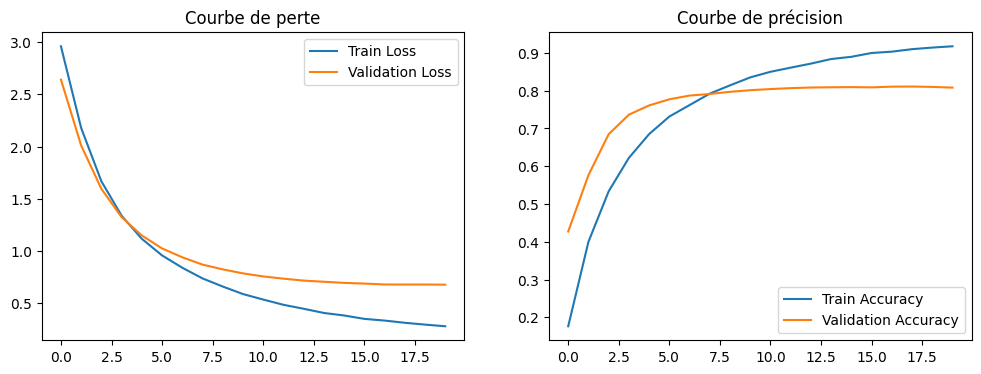

In [73]:
# Evaluation du modele
score = model.evaluate(X_test_pad, 
                       y_test, 
                       verbose = 1)
print("Test accuracy:", score[1])

# Visualisation
plt.figure(figsize = (12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Courbe de perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Courbe de précision')
plt.legend()

plt.show()

531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
              precision    recall  f1-score   support

           0       0.56      0.48      0.52       612
           1       0.67      0.70      0.68       942
           2       0.80      0.85      0.82       357
           3       0.63      0.68      0.66       961
           4       0.68      0.68      0.68       517
           5       0.94      0.92      0.93       991
           6       0.74      0.72      0.73       462
           7       0.81      0.87      0.84      1013
           8       0.66      0.51      0.58       424
           9       0.93      0.91      0.92       841
          10       0.72      0.74      0.73       986
          11       0.74      0.78      0.76       539
          12       0.97      0.98      0.98      2047
          13       0.66      0.58      0.62       146
          14       0.87      0.88      0.88       974
          15       0.74      0.77      0.75       306
          16       0.91      0.94     

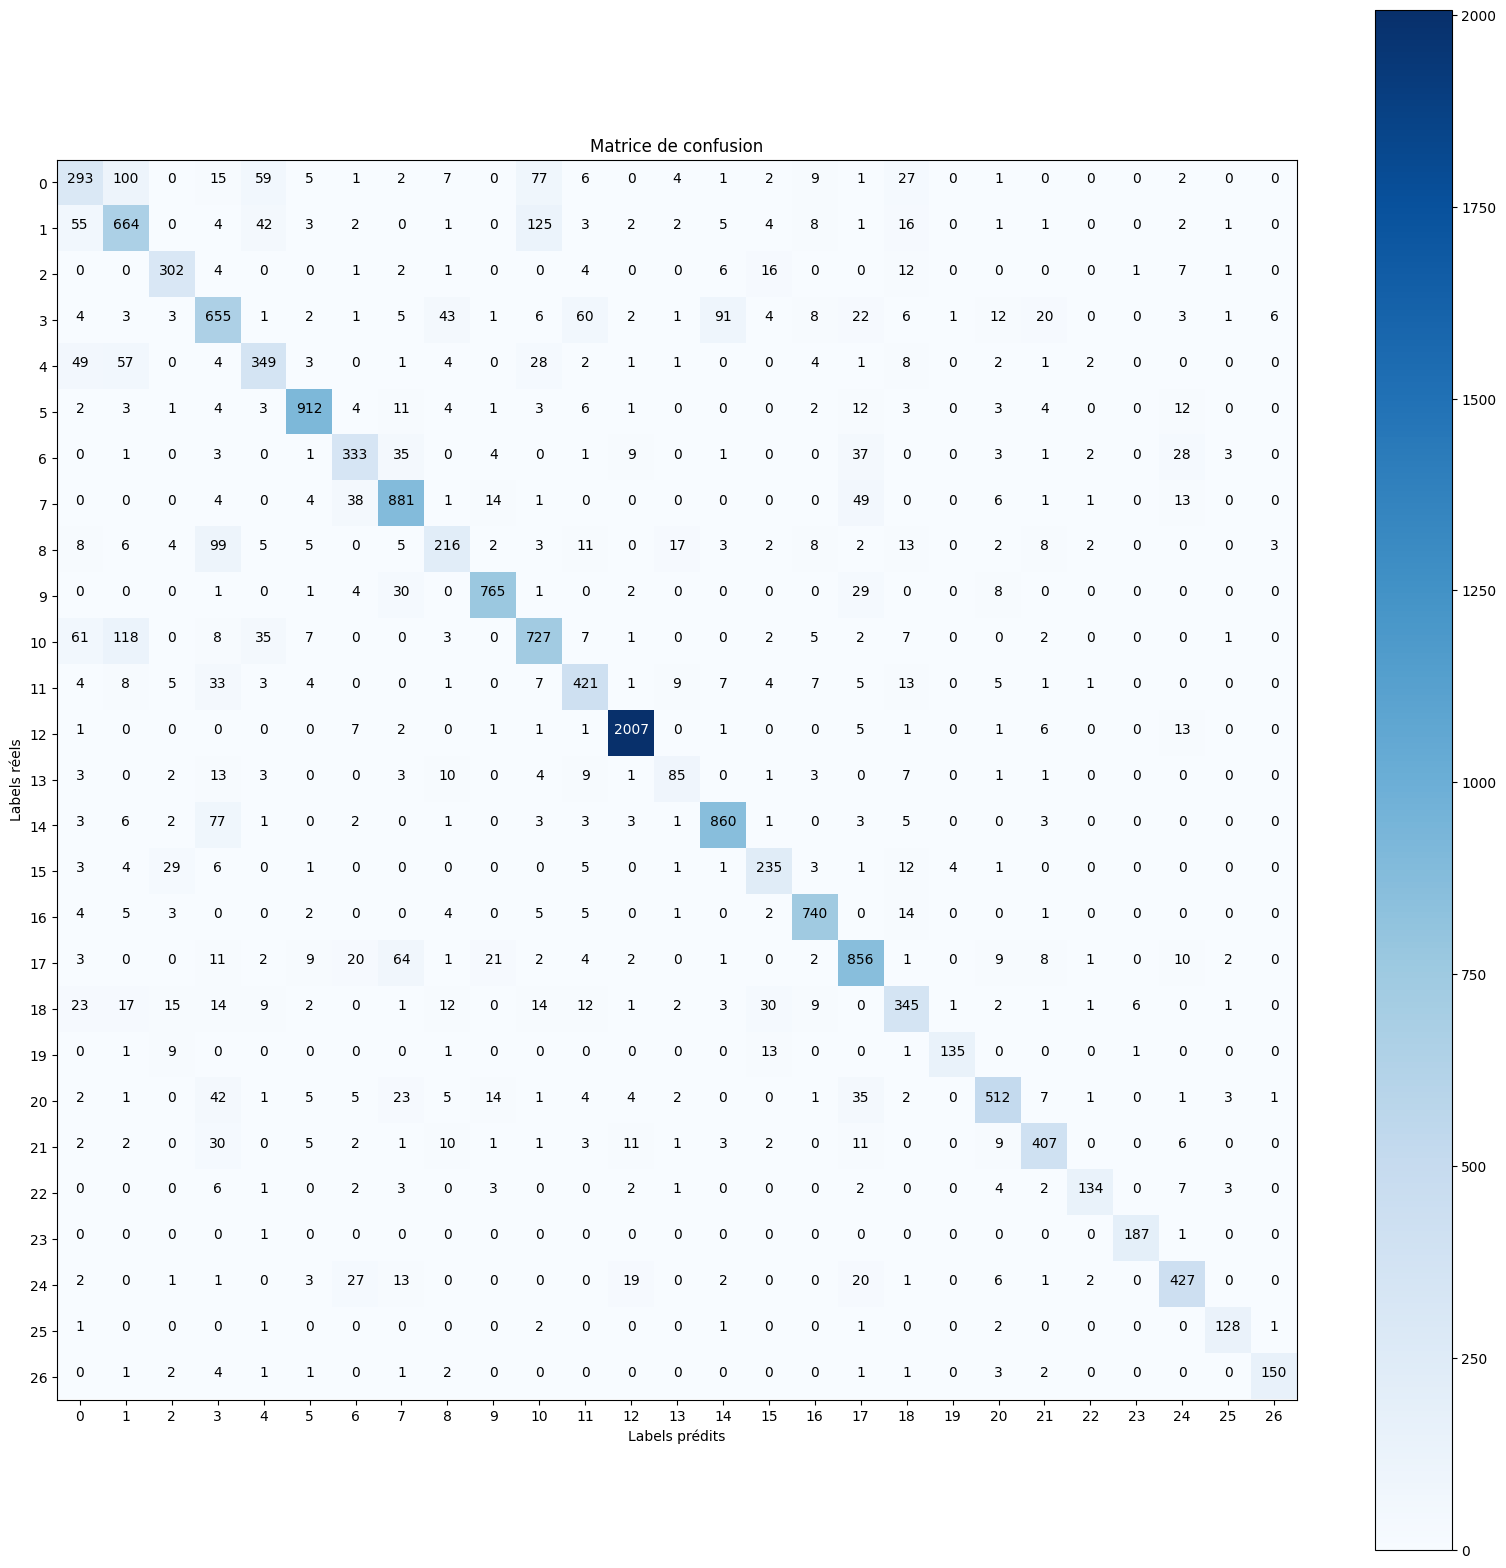

La classe 0 a souvent été prise pour la classe 1.
La classe 0 a souvent été prise pour la classe 4.
La classe 0 a souvent été prise pour la classe 10.
La classe 0 a souvent été prise pour la classe 18.
La classe 1 a souvent été prise pour la classe 0.
La classe 1 a souvent été prise pour la classe 4.
La classe 1 a souvent été prise pour la classe 10.
La classe 3 a souvent été prise pour la classe 8.
La classe 3 a souvent été prise pour la classe 11.
La classe 3 a souvent été prise pour la classe 14.
La classe 3 a souvent été prise pour la classe 17.
La classe 4 a souvent été prise pour la classe 0.
La classe 4 a souvent été prise pour la classe 1.
La classe 4 a souvent été prise pour la classe 10.
La classe 6 a souvent été prise pour la classe 7.
La classe 6 a souvent été prise pour la classe 17.
La classe 6 a souvent été prise pour la classe 24.
La classe 7 a souvent été prise pour la classe 6.
La classe 7 a souvent été prise pour la classe 17.
La classe 8 a souvent été prise pour la 

In [74]:
# Prédiction sur les données de test
y_pred = model.predict(X_test_pad)
test_pred_class = y_pred.argmax(axis = 1)
y_test_class = y_test

# Rapport de classification
print(classification_report(y_test_class, test_pred_class))

# Marice de confusion
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)
classes = range(0, 27) # nombre de classes : 27

# Affichage matrice de confusion
plt.figure(figsize = (20, 20))
plt.imshow(cnf_matrix, interpolation = 'nearest', cmap = 'Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Annotation dans chaque cellule de la matrice de confusion
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > (cnf_matrix.max() / 2) else "black")

plt.ylabel('Labels réels')
plt.xlabel('Labels prédits')
plt.show()

# Identification des cas fréquents de confusion
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if cnf_matrix[i, j] > 20 and i != j:
        print(f"La classe {i} a souvent été prise pour la classe {j}.")
